# 📺 광고 매체에 따른 판매량 예측

### 📥 라이브러리 준비

In [13]:
! python -m pip install -U pip
! pip install pandas scikit-learn matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


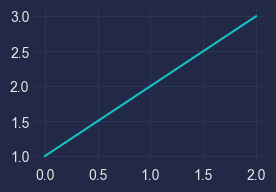

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Thanks to **dhaitz**!
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
pd.Series([1, 2, 3]).plot(figsize=(3, 2))

plt.show()

# .ipynb 커널에서는 plt가 항상 자동으로 표시됩니다. 
# 10번 줄은 수동으로 표시하는 함수라서 .py 파일 내에서는 필요할 수 있지만 여기서는 생략해도 됩니다.
# 10번 줄을 없애면 8번 줄의 반환값이 추가로 표시되기 때문에 못생겨집니다.
# 이걸 없애고 싶다면 plt.show()를 다시 쓰거나, pass로 대체하면 됩니다.

### 📚 데이터 불러오기

In [15]:
# df = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/main/advertising.csv')
df = pd.read_csv('./data/advertising.csv')
display(df.head())

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### 🔍 데이터 이해하기

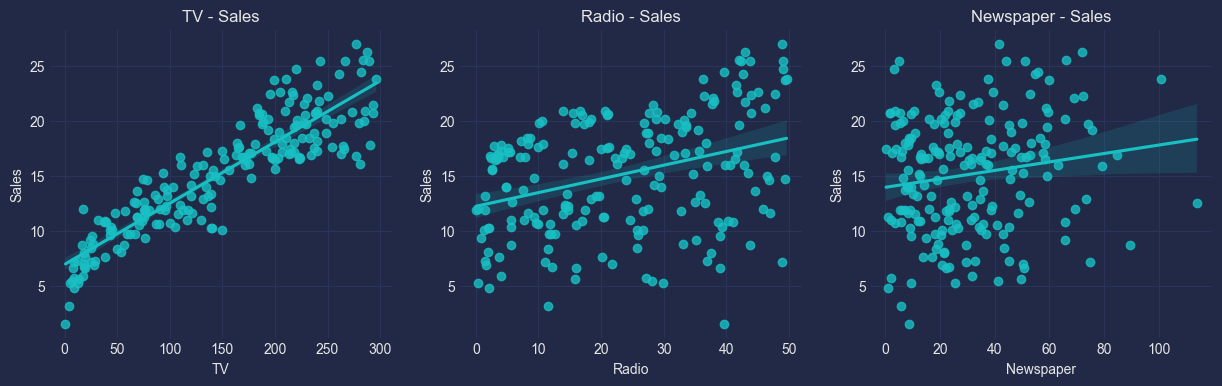

In [16]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.title('TV - Sales')
sns.regplot(data=df, x='TV', y='Sales')

plt.subplot(1, 3, 2)
plt.title('Radio - Sales')
sns.regplot(data=df, x='Radio', y='Sales')

plt.subplot(1, 3, 3)
plt.title('Newspaper - Sales')
sns.regplot(data=df, x='Newspaper', y='Sales')
plt.show()


#### 🧲 상관계수

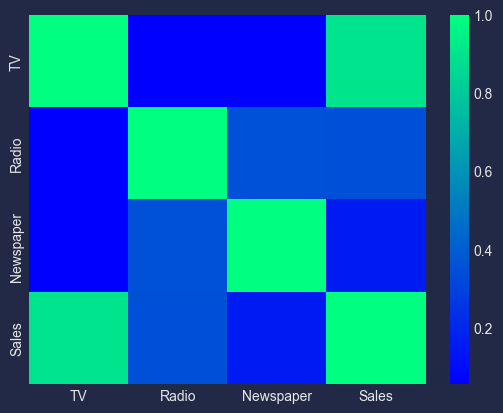

In [17]:
sns.heatmap(df.corr(), cmap='winter')
# 상관계수 행렬을 히트맵으로 표시합니다.
# 밝은 색일수록 더 상관계수가 높습니다.
# 데이터에 열이 많아질 수록, 각 열의 상관계수를 한 눈에 보기 좋겠죠?

plt.show()

### 🔗 선형 회귀; Linear Regression
TV 광고량으로부터 Sales를 예측하는 선형 회귀입니다.

#### 🎚️ 독립 변수와 종속 변수

In [18]:
x = df[['TV']]  
y = df['Sales']

# x: 독립 변수, 입력 변수, Feature(자질)
# y: 종속 변수, 출력 변수

#### ✂️ 학습 데이터와 테스트 데이터 분할

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.75)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50, 1), (150, 1), (50,), (150,))

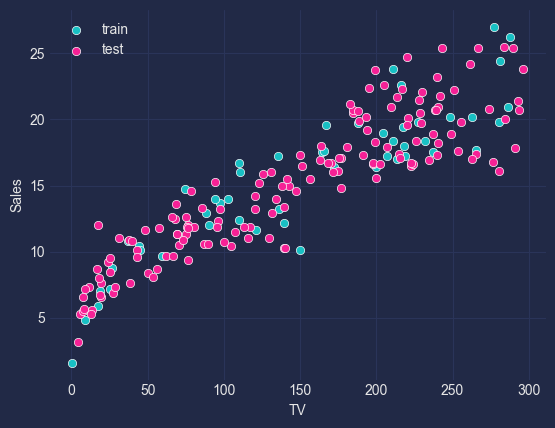

In [28]:
# 선점도 표시
sns.scatterplot(x=x_train['TV'], y=y_train, label='train')
sns.scatterplot(x=x_test['TV'], y=y_test, label='test')
plt.show()